In [4]:
import pandas as pd

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [6]:
dataset = pd.read_csv('dataset4.csv', header=0, sep=';', encoding ='cp1251')
print type(dataset)

<class 'pandas.core.frame.DataFrame'>


In [7]:
dataset[:5]

,Номер депозита,Номер недели жизни депозита,Изменение ставок относительно начала депозита,Изменение курса относительно начала депозита,Объем пополнения
0,1,1,"0,021498469","-0,046133355",0
1,1,2,"0,019604831","0,030864891","0,743323233"
2,1,3,"0,0828467","-0,013098741","0,977404743"
3,1,4,"-0,025355275","-0,007045735","0,772670242"
4,1,5,"-0,10946155","-0,109331567","0,039288761"


In [8]:
dataset.dtypes
dataset.info()
print dataset.columns
z=0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Номер депозита                                    500 non-null int64
Номер недели жизни депозита                       500 non-null int64
Изменение ставок  относительно начала депозита    500 non-null object
Изменение курса относительно начала депозита      500 non-null object
Объем пополнения                                  500 non-null object
dtypes: int64(2), object(3)
memory usage: 13.7+ KB
Index([u'Номер депозита', u'Номер недели жизни депозита',
       u'Изменение ставок  относительно начала депозита',
       u'Изменение курса относительно начала депозита', u'Объем пополнения'],
      dtype='object')


In [9]:
if (z==0):
    dataset[u'Изменение ставок  относительно начала депозита'] = dataset[u'Изменение ставок  относительно начала депозита'].str.replace(',','.').astype(np.float64)
    dataset[u'Изменение курса относительно начала депозита'] = dataset[u'Изменение курса относительно начала депозита'].str.replace(',','.').astype(np.float64)
    dataset[u'Объем пополнения'] = dataset[u'Объем пополнения'].str.replace(',','.').astype(np.float64)
    z+=1
dataset.dtypes

Номер депозита                                      int64
Номер недели жизни депозита                         int64
Изменение ставок  относительно начала депозита    float64
Изменение курса относительно начала депозита      float64
Объем пополнения                                  float64
dtype: object

In [10]:
dataset[:5]

,Номер депозита,Номер недели жизни депозита,Изменение ставок относительно начала депозита,Изменение курса относительно начала депозита,Объем пополнения
0,1,1,0.021498,-0.046133,0.000000
1,1,2,0.019605,0.030865,0.743323
2,1,3,0.082847,-0.013099,0.977405
3,1,4,-0.025355,-0.007046,0.772670
4,1,5,-0.109462,-0.109332,0.039289


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

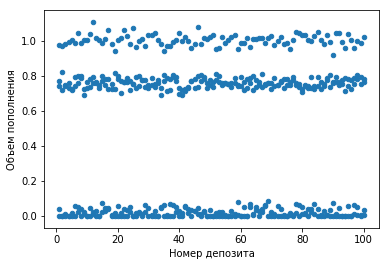

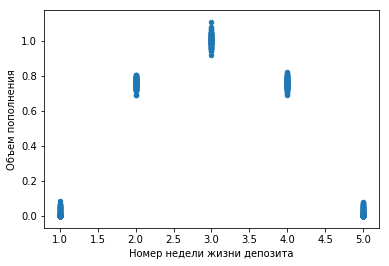

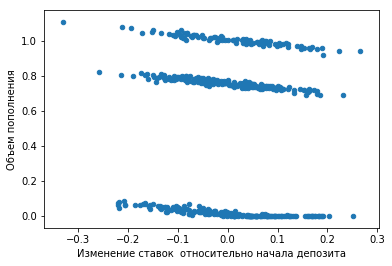

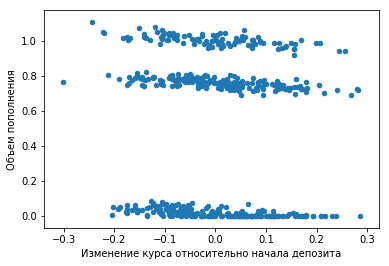

In [12]:
for idx, feature in enumerate(dataset.columns[:-1]):
    dataset.plot(feature, u'Объем пополнения' , subplots=True, kind="scatter")

## Из графиков прослеживается зависимость 
#1) линейная - при росте курса рубля объем пополнения незначительно снижается, при падении - увеличивается. 
#2) линейная - при росте ставок относительно начала депозита объем пополнения незначительно снижается, при падении ставок - увеличивается.
#3) нелинейная - зависимость пополнения от номера недели.

От номера депозита нет зависимости


In [13]:
dataset.corr()

,Номер депозита,Номер недели жизни депозита,Изменение ставок относительно начала депозита,Изменение курса относительно начала депозита,Объем пополнения
Номер депозита,1.000000,0.000000,-0.023969,-0.071483,0.001341
Номер недели жизни депозита,0.000000,1.000000,-0.026718,-0.022006,0.001661
Изменение ставок относительно начала депозита,-0.023969,-0.026718,1.000000,0.709404,-0.021745
Изменение курса относительно начала депозита,-0.071483,-0.022006,0.709404,1.000000,-0.034975
Объем пополнения,0.001341,0.001661,-0.021745,-0.034975,1.000000


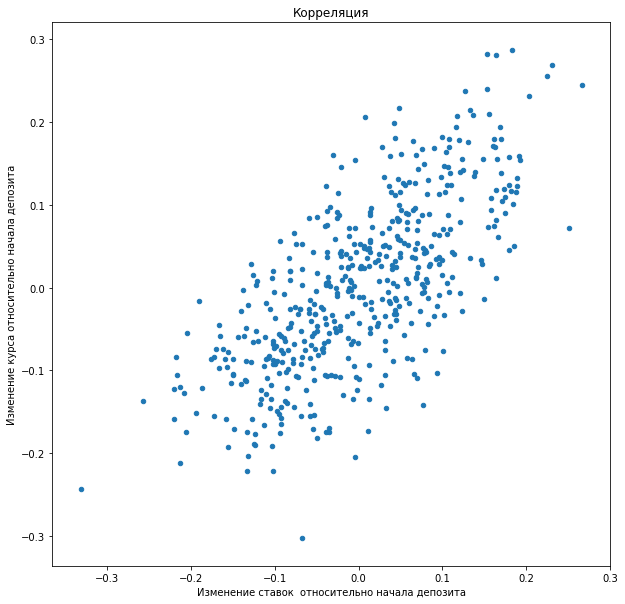

In [14]:
dataset.plot(x=u'Изменение ставок  относительно начала депозита', y=u'Изменение курса относительно начала депозита', title=u'Корреляция', kind='scatter', figsize=(10,10));

Отметим корреляцию двух параметров: Изменение ставок относительно начала депозита и Изменение курса относительно начала депозита - составляет 0.709404. Объяснение следующее - при росте ставок по рублевым депозитам растет их привлекательность у инвесторов по сравнению с другими инвестиционными инструментами, вследствие этого они должны покупать рубль для размещения средств на депозитах. При увеличении спроса на рубль растет курс рубля. Это один из инструментов денежно-кредитной политики ЦБ РФ.

1.      построить модель (описать зависимость объема пополнения от некоторых факторов; выбор факторов – по сути это и есть задача)

2.      описать экономическую логику такой модели

3.      оценить коэффициенты модели на данной выборке

4.      оценить качество модели 

a.       R^2, R^2 adjusted, t-test, F-test – посчитать и прокомментировать

b.      наличие/отсутствие в модели мультиколлинеарности, гомоскедастичности


1. Если построить линейную модель, то алгоритм будет ошибаться из-за нелинейно зависимости ответа от номера недели депозита. Обучать линейную модель не вижу смысла

2. Экономическую логику описал (по моему мнению)

3. Коэффициенты модели на линейно зависимых (прямо или обратно) признаках будут к месту. К признаку номер недели будет некий средняющий коэффициент, поскольку значения наичнаются с 0 доходят до 1 и возвращаются в 0 (перевернутая парабола) 

4. Поскольку модели нет и оценивать нечего, справедливости ради укажу формулы расчета всех параметров
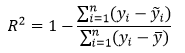



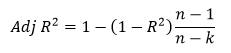

F-test. Данный тест очень важен в регрессионном анализе и по существу является частным случаем проверки ограничений. В данном случае нулевая гипотеза — об одновременном равенстве нулю всех коэффициентов при факторах регрессионной модели (то есть всего ограничений k-1). В данном случае короткая модель — это просто константа в качестве фактора, то есть коэффициент детерминации короткой модели равен нулю. Статистика теста равна:

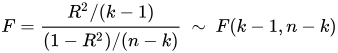

Проверка гипотез о коэффициенте линейной регрессии

Частным случаем линейного ограничения является проверка гипотезы о равенстве коэффициента bj регрессии некоторому значению a . В этом случае соответстующая t-статистика равна:

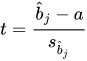

### Проблема мультиколлинеарности будет присутствовать, поскольку корреляция двух признаков достаточно высокая (выше 70%)